# Airline/Flight Delay Prediction

Download link= https://www.kaggle.com/datasets/mrferozi/flight-delays?select=flight.csv

This dataset was downloaded from the US Department of transport website. This website holds both schedule and actual departure and arrival times.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('flight.csv')
df

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Tai_lNum,FlightNum,Origin_Airport,Origin_City_Name,...,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Top_Carriers,Top_Origin,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,2016,7,1,5,01/07/2016,AA,N793AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
1,2016,7,2,6,02/07/2016,AA,N784AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
2,2016,7,4,1,04/07/2016,AA,N785AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0600-1200,0600-0800,0600-0700
3,2016,7,5,2,05/07/2016,AA,N790AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
4,2016,7,6,3,06/07/2016,AA,N799AA,1,BOS,"Boston, MA",...,0,0,0,0,0,1,1,0000-0600,0400-0600,0500-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,21/07/2016,AA,N892AA,146,LAX,"Los Angeles, CA",...,30,0,6,0,0,1,1,0600-1200,0800-1000,0800-0900
4817,2016,7,22,5,22/07/2016,AA,N855AA,146,LAX,"Los Angeles, CA",...,0,0,0,0,0,1,1,0600-1200,0800-1000,0800-0900
4818,2016,7,24,7,24/07/2016,AA,N3AVAA,146,LAX,"Los Angeles, CA",...,0,0,0,0,0,1,1,0600-1200,0800-1000,0800-0900
4819,2016,7,25,1,25/07/2016,AA,N886AA,146,LAX,"Los Angeles, CA",...,0,0,17,0,0,1,1,0600-1200,0800-1000,0800-0900


### 1. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 4821 non-null   int64 
 1   Month                4821 non-null   int64 
 2   Day                  4821 non-null   int64 
 3   DayOfWeek            4821 non-null   int64 
 4   Flight_Date          4821 non-null   object
 5   UniqueCarrier        4821 non-null   object
 6   Tai_lNum             4821 non-null   object
 7   FlightNum            4821 non-null   int64 
 8   Origin_Airport       4821 non-null   object
 9   Origin_City_Name     4821 non-null   object
 10  Origin_State         4821 non-null   object
 11  Scheduled_Departure  4821 non-null   int64 
 12  Departure_Time       4821 non-null   int64 
 13  Dep_Delay            4821 non-null   int64 
 14  DepDel15             4821 non-null   int64 
 15  Dep_Delay_Groups     4821 non-null   int64 
 16  Schedu

### 2. Check how many number of rows and columns are present in the dataset.

In [4]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 4821
Number of Columns: 35


### 3. Check if null values are there or not.

In [5]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
DayOfWeek              0
Flight_Date            0
UniqueCarrier          0
Tai_lNum               0
FlightNum              0
Origin_Airport         0
Origin_City_Name       0
Origin_State           0
Scheduled_Departure    0
Departure_Time         0
Dep_Delay              0
DepDel15               0
Dep_Delay_Groups       0
Scheduled_Arrival      0
Arrival_Time           0
Arrival_Delay          0
Arr_Delay_Minutes      0
Arr_Del_morethan15     0
Cancelled              0
Diverted               0
Distance               0
DistanceGroup          0
Carrier_Delay          0
WeatherDelay           0
NAS_Delay              0
Security_Delay         0
Late_Aircraft_Delay    0
Top_Carriers           0
Top_Origin             0
DEPTIME_GROUP1         0
DEPTIME_GROUP2         0
DEPTIME_GROUP3         0
dtype: int64

In [6]:
df.isna().any()

Year                   False
Month                  False
Day                    False
DayOfWeek              False
Flight_Date            False
UniqueCarrier          False
Tai_lNum               False
FlightNum              False
Origin_Airport         False
Origin_City_Name       False
Origin_State           False
Scheduled_Departure    False
Departure_Time         False
Dep_Delay              False
DepDel15               False
Dep_Delay_Groups       False
Scheduled_Arrival      False
Arrival_Time           False
Arrival_Delay          False
Arr_Delay_Minutes      False
Arr_Del_morethan15     False
Cancelled              False
Diverted               False
Distance               False
DistanceGroup          False
Carrier_Delay          False
WeatherDelay           False
NAS_Delay              False
Security_Delay         False
Late_Aircraft_Delay    False
Top_Carriers           False
Top_Origin             False
DEPTIME_GROUP1         False
DEPTIME_GROUP2         False
DEPTIME_GROUP3

### This dataset is not having NaN or missing values. So we can perform analysis of numerical columns and categorical columns.

### 4. Check how many number of numerical columns are there in the dataset

In [7]:
num_col=df.select_dtypes(include=['int64','float64']).columns
print(num_col)
print("Total number of numeric columns: ",num_col.shape[0])

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'FlightNum', 'Scheduled_Departure',
       'Departure_Time', 'Dep_Delay', 'DepDel15', 'Dep_Delay_Groups',
       'Scheduled_Arrival', 'Arrival_Time', 'Arrival_Delay',
       'Arr_Delay_Minutes', 'Arr_Del_morethan15', 'Cancelled', 'Diverted',
       'Distance', 'DistanceGroup', 'Carrier_Delay', 'WeatherDelay',
       'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'Top_Carriers',
       'Top_Origin'],
      dtype='object')
Total number of numeric columns:  26


In [8]:
num_df=df.select_dtypes(include=['int64','float64'])
num_df

,Year,Month,Day,DayOfWeek,FlightNum,Scheduled_Departure,Departure_Time,Dep_Delay,DepDel15,Dep_Delay_Groups,...,Diverted,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Top_Carriers,Top_Origin
0,2016,7,1,5,1,600,554,-6,0,-1,...,0,187,1,0,0,0,0,0,1,1
1,2016,7,2,6,1,600,554,-6,0,-1,...,0,187,1,0,0,0,0,0,1,1
2,2016,7,4,1,1,600,601,1,0,0,...,0,187,1,0,0,0,0,0,1,1
3,2016,7,5,2,1,600,556,-4,0,-1,...,0,187,1,0,0,0,0,0,1,1
4,2016,7,6,3,1,600,552,-8,0,-1,...,0,187,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,146,815,845,30,1,2,...,0,2611,11,30,0,6,0,0,1,1
4817,2016,7,22,5,146,815,811,-4,0,-1,...,0,2611,11,0,0,0,0,0,1,1
4818,2016,7,24,7,146,815,809,-6,0,-1,...,0,2611,11,0,0,0,0,0,1,1
4819,2016,7,25,1,146,815,811,-4,0,-1,...,0,2611,11,0,0,17,0,0,1,1


In [9]:
# unwanted num_columns: 'DepDel15','Dep_Delay_Groups','Arr_Del_morethan15','Arrival_Delay','Cancelled','Diverted','DistanceGroup','Top_Carriers','Top_Origin'

### 5. Check how many number of categorical columns are there in the dataset

In [10]:
cat_col=df.select_dtypes(include='O').columns
print(cat_col)
print("Total number of categorical columns: ",cat_col.shape[0])

Index(['Flight_Date', 'UniqueCarrier', 'Tai_lNum', 'Origin_Airport',
       'Origin_City_Name', 'Origin_State', 'DEPTIME_GROUP1', 'DEPTIME_GROUP2',
       'DEPTIME_GROUP3'],
      dtype='object')
Total number of categorical columns:  9


In [11]:
cat_df=df.select_dtypes(include=['O'])
cat_df

,Flight_Date,UniqueCarrier,Tai_lNum,Origin_Airport,Origin_City_Name,Origin_State,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,01/07/2016,AA,N793AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
1,02/07/2016,AA,N784AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
2,04/07/2016,AA,N785AA,BOS,"Boston, MA",MA,0600-1200,0600-0800,0600-0700
3,05/07/2016,AA,N790AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
4,06/07/2016,AA,N799AA,BOS,"Boston, MA",MA,0000-0600,0400-0600,0500-0600
...,...,...,...,...,...,...,...,...,...
4816,21/07/2016,AA,N892AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4817,22/07/2016,AA,N855AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4818,24/07/2016,AA,N3AVAA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900
4819,25/07/2016,AA,N886AA,LAX,"Los Angeles, CA",CA,0600-1200,0800-1000,0800-0900


In [12]:
# not usable cat_columns: 'UniqueCarrier','Tai_lNum','DEPTIME_GROUP1','DEPTIME_GROUP2','DEPTIME_GROUP3'

### 6. Drop unwanted columns from dataset

In [13]:
df=df.drop(['UniqueCarrier','Tai_lNum','DEPTIME_GROUP1','DEPTIME_GROUP2','DEPTIME_GROUP3','DepDel15','Dep_Delay_Groups','Arr_Del_morethan15','Arrival_Delay','Cancelled','Diverted','DistanceGroup','Top_Carriers','Top_Origin'],axis=1,inplace=True)
df

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,1,BOS,"Boston, MA",MA,600,...,711,707,-4,0,187,0,0,0,0,0
1,2016,7,2,6,02/07/2016,1,BOS,"Boston, MA",MA,600,...,711,703,-8,0,187,0,0,0,0,0
2,2016,7,4,1,04/07/2016,1,BOS,"Boston, MA",MA,600,...,711,706,-5,0,187,0,0,0,0,0
3,2016,7,5,2,05/07/2016,1,BOS,"Boston, MA",MA,600,...,711,709,-2,0,187,0,0,0,0,0
4,2016,7,6,3,06/07/2016,1,BOS,"Boston, MA",MA,600,...,711,659,-12,0,187,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,4,21/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1728,36,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1626,-26,0,2611,0,0,0,0,0
4818,2016,7,24,7,24/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1619,-33,0,2611,0,0,0,0,0
4819,2016,7,25,1,25/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1709,17,17,2611,0,0,17,0,0


### 7. Show correlation among all columns of dataset

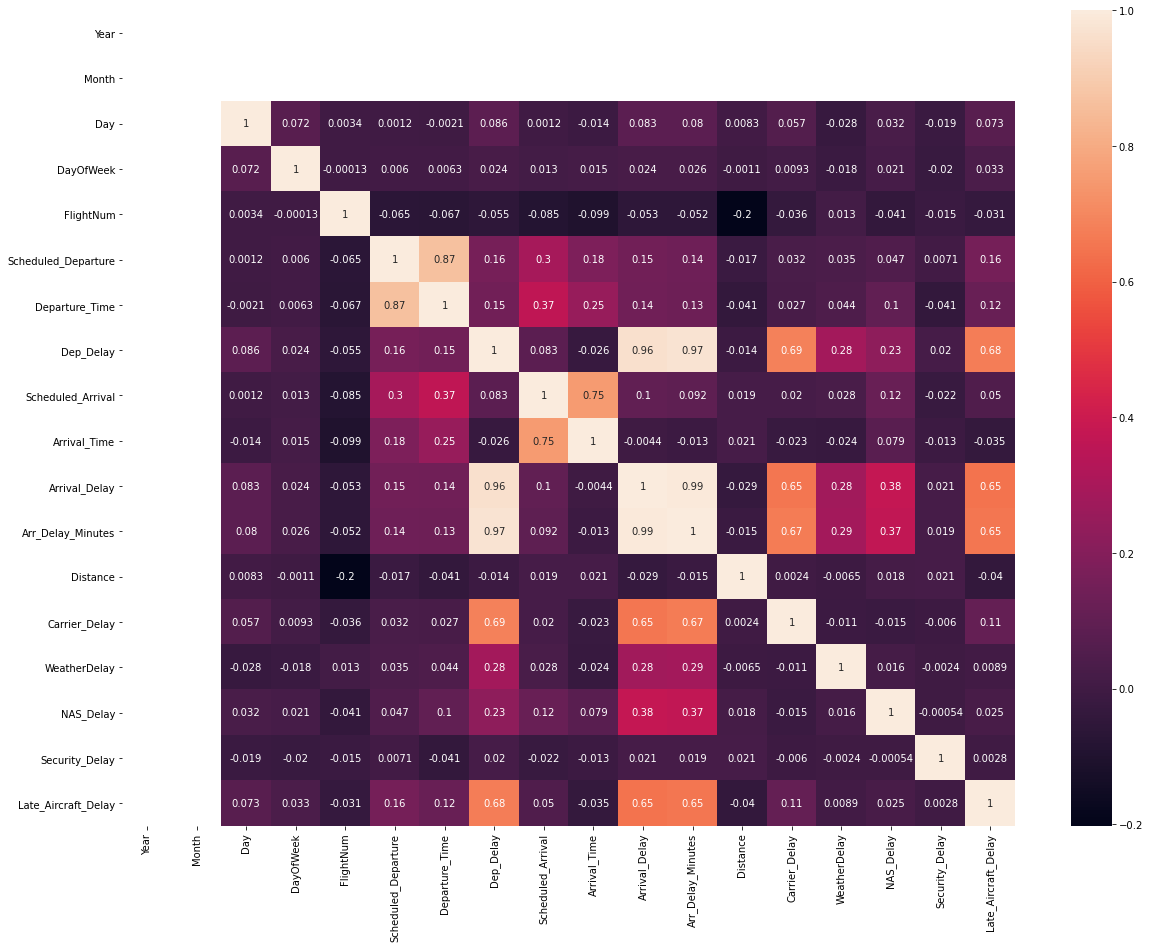

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 8. Show first 10 data

In [14]:
df.head(10)

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,1,BOS,"Boston, MA",MA,600,...,711,707,-4,0,187,0,0,0,0,0
1,2016,7,2,6,02/07/2016,1,BOS,"Boston, MA",MA,600,...,711,703,-8,0,187,0,0,0,0,0
2,2016,7,4,1,04/07/2016,1,BOS,"Boston, MA",MA,600,...,711,706,-5,0,187,0,0,0,0,0
3,2016,7,5,2,05/07/2016,1,BOS,"Boston, MA",MA,600,...,711,709,-2,0,187,0,0,0,0,0
4,2016,7,6,3,06/07/2016,1,BOS,"Boston, MA",MA,600,...,711,659,-12,0,187,0,0,0,0,0
5,2016,7,7,4,07/07/2016,1,BOS,"Boston, MA",MA,600,...,711,716,5,5,187,0,0,0,0,0
6,2016,7,8,5,08/07/2016,1,BOS,"Boston, MA",MA,600,...,711,705,-6,0,187,0,0,0,0,0
7,2016,7,9,6,09/07/2016,1,BOS,"Boston, MA",MA,600,...,711,710,-1,0,187,0,0,0,0,0
8,2016,7,11,1,11/07/2016,1,BOS,"Boston, MA",MA,600,...,711,701,-10,0,187,0,0,0,0,0
9,2016,7,12,2,12/07/2016,1,BOS,"Boston, MA",MA,600,...,711,722,11,11,187,0,0,0,0,0


### 9. Show last 10 data

In [15]:
df.tail(10)

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
4811,2016,7,16,6,16/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1630,-22,0,2611,0,0,0,0,0
4812,2016,7,17,7,17/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1855,123,123,2611,123,0,0,0,0
4813,2016,7,18,1,18/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1631,-21,0,2611,0,0,0,0,0
4814,2016,7,19,2,19/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1704,12,12,2611,0,0,0,0,0
4815,2016,7,20,3,20/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1648,-4,0,2611,0,0,0,0,0
4816,2016,7,21,4,21/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1728,36,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1626,-26,0,2611,0,0,0,0,0
4818,2016,7,24,7,24/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1619,-33,0,2611,0,0,0,0,0
4819,2016,7,25,1,25/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1709,17,17,2611,0,0,17,0,0
4820,2016,7,26,2,26/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1819,87,87,2611,87,0,0,0,0


### 10. Show the count of  Origin Airport. 

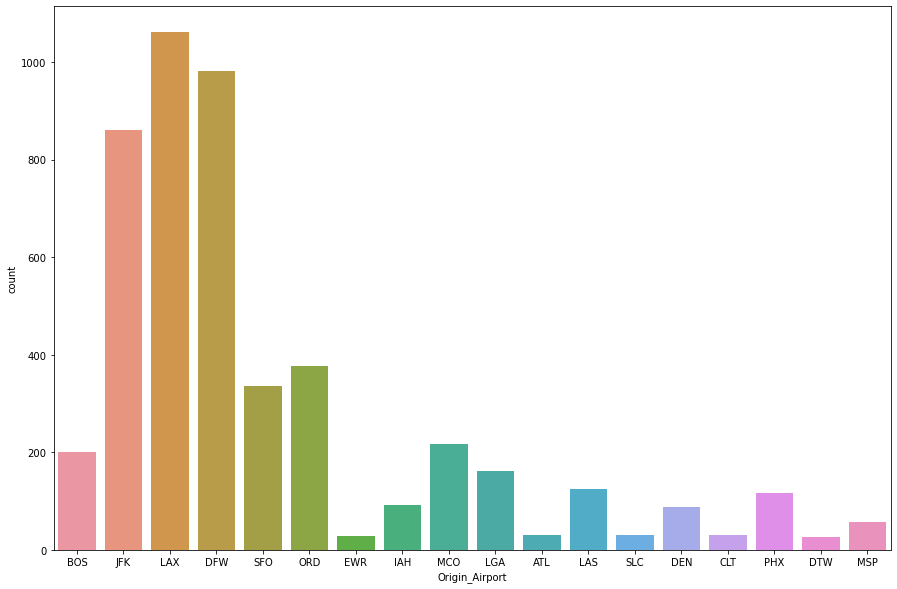

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Origin_Airport'])
plt.show()

### 11. Check the difference between arrival time and departure time for flight number 279 of 8 july 2016

In [19]:
a_d=df[(df['Flight_Date']=='08/07/2016') & (df['FlightNum']==279)]
(a_d['Arrival_Time'])-(a_d['Departure_Time'])

3373    365
dtype: int64

### 12. Show the Correlation between Scheduled_Departure time and Scheduled_Arrival time

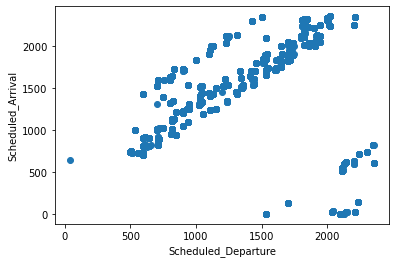

In [16]:
plt.scatter(df['Scheduled_Departure'],df['Scheduled_Arrival']) 
plt.xlabel('Scheduled_Departure')
plt.ylabel('Scheduled_Arrival')
plt.show()

### 13. What are the arrival time and delay arrival time for 5th day of week

In [34]:
print("Arrival Delay Time for 5th days of week\n",df[df['DayOfWeek']==5]['Arr_Delay_Minutes'])
print("\nArrival Time for 5th days of week\n",df[df['DayOfWeek']==5]['Arrival_Time'])

Arrival Delay Time for 5th days of week
 0        0
1        0
2        0
3        0
4        0
        ..
4816    36
4817     0
4818     0
4819    17
4820    87
Name: Arr_Delay_Minutes, Length: 4821, dtype: int64

Arrival Time for 5th days of week
 0        707
1        703
2        706
3        709
4        659
        ... 
4816    1728
4817    1626
4818    1619
4819    1709
4820    1819
Name: Arrival_Time, Length: 4821, dtype: int64


### 14. Check the total number of flights which are affected by weather

In [54]:
df[df['WeatherDelay']!=0]['FlightNum'].count()

100

### 15. Get the data affected by carrier_delay

In [55]:
df[df['Carrier_Delay']!=0]

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
11,2016,7,14,5,14/07/2016,1,BOS,"Boston, MA",MA,600,...,711,752,41,41,187,40,0,1,0,0
17,2016,7,21,5,21/07/2016,1,BOS,"Boston, MA",MA,600,...,711,858,107,107,187,105,0,2,0,0
19,2016,7,23,5,23/07/2016,1,BOS,"Boston, MA",MA,600,...,711,740,29,29,187,21,0,8,0,0
23,2016,7,30,5,30/07/2016,1,BOS,"Boston, MA",MA,600,...,711,821,70,70,187,48,0,22,0,0
28,2016,7,5,5,05/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1159,21,21,2475,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2016,7,14,5,14/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1714,22,22,2611,15,0,7,0,0
4810,2016,7,15,5,15/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,2136,284,284,2611,284,0,0,0,0
4812,2016,7,17,5,17/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1855,123,123,2611,123,0,0,0,0
4816,2016,7,21,5,21/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1728,36,36,2611,30,0,6,0,0


### 16. Plot the states with respect to arrival delay time

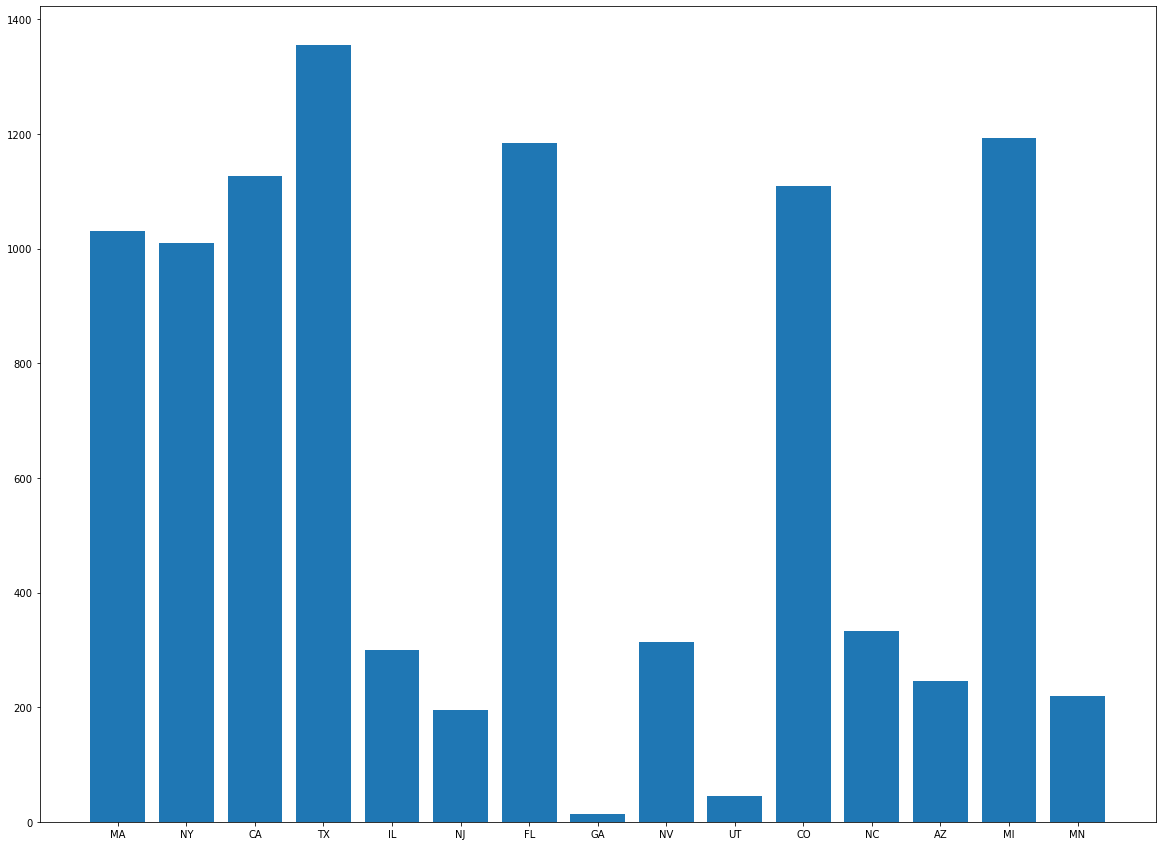

In [61]:
plt.figure(figsize=(20,15))
plt.bar(df['Origin_State'],df['Arr_Delay_Minutes'])
plt.show()

### 17. How many number of airports are there in Boston, MA

In [81]:
df[df['Origin_City_Name']=='Boston, MA']

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,2016,7,1,5,01/07/2016,1,BOS,"Boston, MA",MA,600,...,711,707,-4,0,187,0,0,0,0,0
1,2016,7,2,5,02/07/2016,1,BOS,"Boston, MA",MA,600,...,711,703,-8,0,187,0,0,0,0,0
2,2016,7,4,5,04/07/2016,1,BOS,"Boston, MA",MA,600,...,711,706,-5,0,187,0,0,0,0,0
3,2016,7,5,5,05/07/2016,1,BOS,"Boston, MA",MA,600,...,711,709,-2,0,187,0,0,0,0,0
4,2016,7,6,5,06/07/2016,1,BOS,"Boston, MA",MA,600,...,711,659,-12,0,187,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,2016,7,26,5,26/07/2016,40,BOS,"Boston, MA",MA,1910,...,2058,2116,18,18,867,3,0,15,0,0
3681,2016,7,27,5,27/07/2016,40,BOS,"Boston, MA",MA,1910,...,2058,2119,21,21,867,13,0,8,0,0
3682,2016,7,29,5,29/07/2016,40,BOS,"Boston, MA",MA,1910,...,2058,2302,124,124,867,0,0,24,0,100
3683,2016,7,30,5,30/07/2016,40,BOS,"Boston, MA",MA,1910,...,2058,2115,17,17,867,8,0,0,0,9


In [82]:
df[df['Origin_City_Name']=='Boston, MA']['Origin_Airport'].count()

201

### 18. Check data where distance is greater than 1000 and check total numbers of data.

In [99]:
df[df['Distance']>1000]

,Year,Month,Day,DayOfWeek,Flight_Date,FlightNum,Origin_Airport,Origin_City_Name,Origin_State,Scheduled_Departure,...,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Arr_Delay_Minutes,Distance,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
24,2016,7,1,5,01/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1200,22,22,2475,0,0,6,0,16
25,2016,7,2,5,02/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1138,0,0,2475,0,0,0,0,0
26,2016,7,3,5,03/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1135,-3,0,2475,0,0,0,0,0
27,2016,7,4,5,04/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1122,-16,0,2475,0,0,0,0,0
28,2016,7,5,5,05/07/2016,1,JFK,"New York, NY",NY,830,...,1138,1159,21,21,2475,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2016,7,21,5,21/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1728,36,36,2611,30,0,6,0,0
4817,2016,7,22,5,22/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1626,-26,0,2611,0,0,0,0,0
4818,2016,7,24,5,24/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1619,-33,0,2611,0,0,0,0,0
4819,2016,7,25,5,25/07/2016,146,LAX,"Los Angeles, CA",CA,815,...,1652,1709,17,17,2611,0,0,17,0,0


In [98]:
df[df['Distance']>1000]['Distance'].count()

3029

### 19. Numbers of Airports in each origin airports

In [117]:
df['Origin_Airport'].value_counts()

LAX    1061
DFW     982
JFK     860
ORD     377
SFO     336
MCO     218
BOS     201
LGA     162
LAS     125
PHX     117
IAH      91
DEN      87
MSP      57
SLC      31
ATL      31
CLT      30
EWR      29
DTW      26
Name: Origin_Airport, dtype: int64

### 20. Show an useful plot for above question

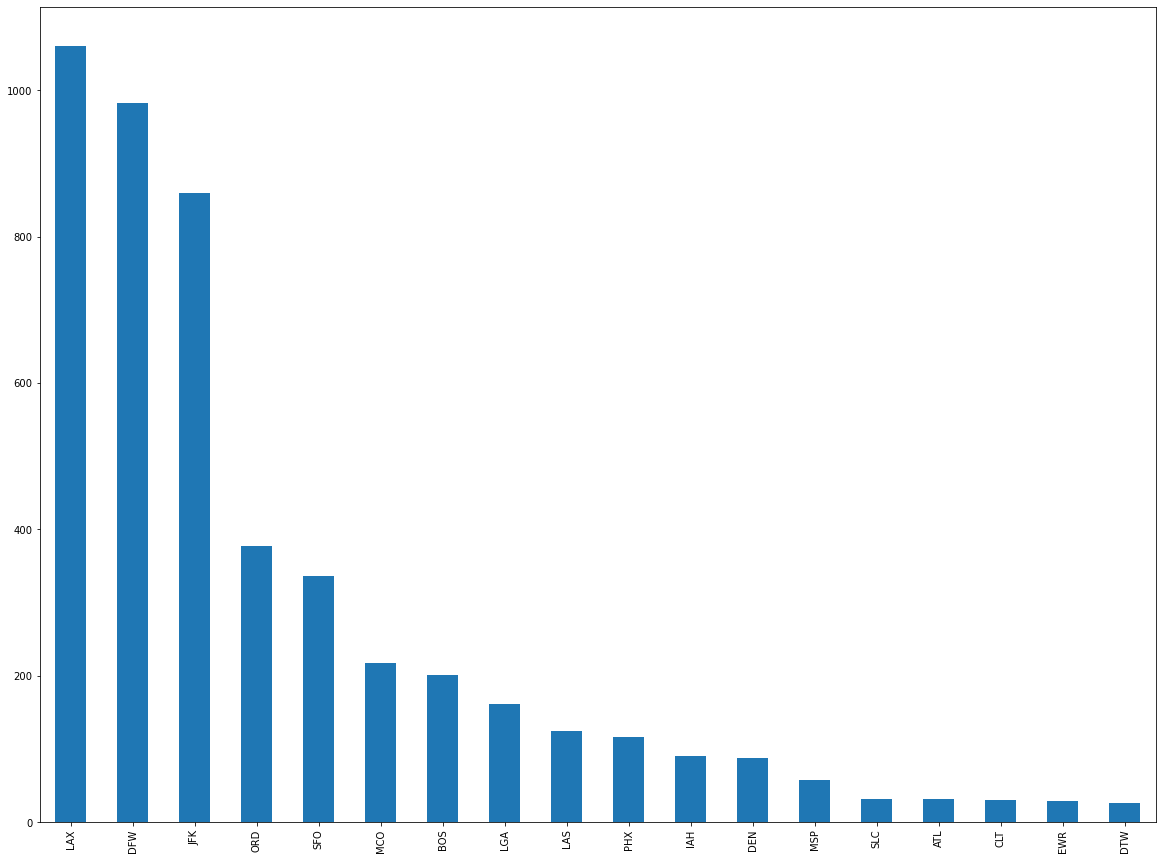

In [119]:
plt.figure(figsize=(20,15))
df['Origin_Airport'].value_counts().plot(kind='bar')
plt.show()

### 21. Top 5 Airports with respect to highest number of airports

In [120]:
df['Origin_Airport'].value_counts()[:5]

LAX    1061
DFW     982
JFK     860
ORD     377
SFO     336
Name: Origin_Airport, dtype: int64

### 22. Top 5 States with respect to lowest distance(from low to high)

In [159]:
df.groupby('Origin_State')['Distance'].min().sort_values()[:5]

Origin_State
MA    187
NY    187
FL    192
CA    236
NV    236
Name: Distance, dtype: int64

### 23. Show how many percentage of states aquired the airports

<AxesSubplot:ylabel='Origin_State'>

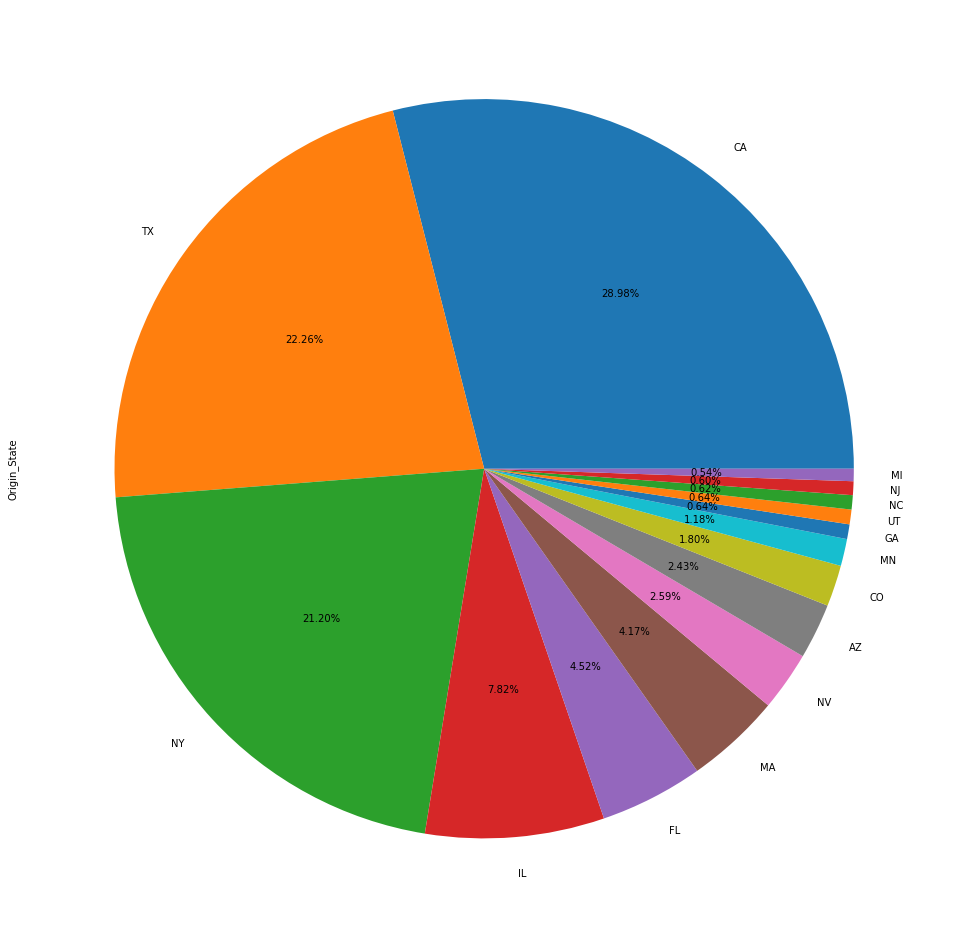

In [143]:
plt.figure(figsize=(17,17))
df['Origin_State'].value_counts().plot(kind="pie",autopct="%.2f%%")